# understanding splines and bezier curves first

In [3]:
#only numpy implementation

import numpy as np
import matplotlib.pyplot as plt

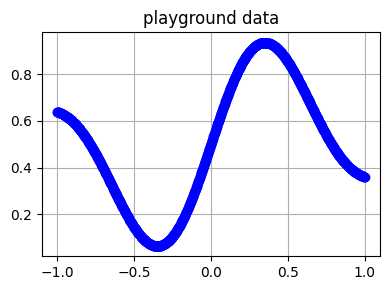

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 1000)
y = .5 * np.sin(4*x) * np.exp(-x**2) + .5

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y, 'o', color='b')
ax.set_title("playground data")
ax.grid()
fig.tight_layout()

In [7]:
grid = np.linspace(-1, 1, 10)
print(f"grid shape {grid.shape}, values: {grid}")
print(f"x shape {x.shape}, values: {x[:5]}")

grid shape (10,), values: [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
x shape (1000,), values: [-1.         -0.997998   -0.995996   -0.99399399 -0.99199199]


General higher order basis function formula $$ N_{i,k}(x) = \frac{x - t_i}{t_{i+k} - t_i} N_{i,k-1}(x) + \frac{t_{i+k+1} - x}{t_{i+k+1} - t_{i+1}} N_{i+1,k-1}(x) $$

In [12]:
grid_ = grid.reshape(1, -1)
x_ = x.reshape(-1, 1)
print(f"grid shape {grid_.shape}, values: {grid_}")
print(f"x shape {x_.shape}, values: {x_[:5]}")

grid shape (1, 10), values: [[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]]
x shape (1000, 1), values: [[-1.        ]
 [-0.997998  ]
 [-0.995996  ]
 [-0.99399399]
 [-0.99199199]]


In [16]:
# recursive spline formulation

# order 0, piecewise constant function
k = 0
value1 = (x_ >= grid_[:,:-1]) * (x_ < grid_[:, 1:]) #base case, if 1 if  x  lies within the interval [t_i, t_{i+1}) and 0 otherwise.

k = 1 # order 1
value21 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value1[:, :-1]
value22 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value1[:, 1:]
value2 = value21 + value22

k = 2 # order 2
value31 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value2[:, :-1]
value32 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value2[:, 1:]
value3 = value31 + value32

k = 3 # order 3
value41 = (x_ - grid_[:, :-(k+1)]) / (grid_[:, 1:-k] - grid_[:, :-(k+1)]) * value3[:, :-1]
value42 = (grid_[:, (k+1):] - x_) / (grid_[:, (k+1):] - grid_[:, 1:-k]) * value3[:, 1:]
value4 = value41 + value42

In [17]:
print(f"k=0, number of basis functions: {value1.shape[-1]}")
print(f"k=1, number of basis functions: {value2.shape[-1]}")
print(f"k=2, number of basis functions: {value3.shape[-1]}")
print(f"k=3, number of basis functions: {value4.shape[-1]}")

k=0, number of basis functions: 9
k=1, number of basis functions: 8
k=2, number of basis functions: 7
k=3, number of basis functions: 6


In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), dpi=100)
n_plot = 4
basis_funcs = [(value1, "k=0"), (value2, "k=1"), (value3, "k=2"), (value4, "k=3")]
for i, (basis, title) in enumerate(basis_funcs):
    ax = axs[i//2, i%2]
    ax.plot(x, basis[:5])
    ax.set_title(title)
    ax.grid()